# DATA LENDING CLUB (PRACTICA 1)

El primer paso para la realización de esta práctica es importar los paquetes y las librerías necesarias para comenzar el tratamiento de los datos.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Después, importamos la información que contiene nuestra base de datos. 

In [125]:
df = pd.read_csv('pd_data_initial_preprocessing.csv')
df.head()

C:\Users\amaia\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,url,zip_code,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
0,112435993,https://lendingclub.com/browse/loanDetail.acti...,148xx,NaN,NaN,NaN,NaN,55.0,1.0,2315.0,...,w,Individual,0.0,0.0,2300.0,0.0,381.0,4.0,9.0,1985.0
1,112290210,https://lendingclub.com/browse/loanDetail.acti...,021xx,NaN,69.0,NaN,26.0,94.0,0.0,1962.0,...,w,Individual,0.0,0.0,16000.0,7.0,300.0,9.0,6.0,1992.0
2,112436985,https://lendingclub.com/browse/loanDetail.acti...,018xx,NaN,NaN,NaN,10.0,45.0,1.0,1950.0,...,w,Individual,0.0,0.0,6025.0,2.0,180.0,11.0,6.0,2002.0
3,112439006,https://lendingclub.com/browse/loanDetail.acti...,913xx,NaN,95.0,NaN,6.0,60.0,1.0,4240.0,...,w,Individual,0.0,0.0,20400.0,0.0,125.0,15.0,1.0,2007.0
4,112438929,https://lendingclub.com/browse/loanDetail.acti...,560xx,NaN,72.0,26.0,127.0,78.0,0.0,2996.0,...,w,Individual,0.0,0.0,13000.0,1.0,184.0,5.0,2.0,2002.0


Para saber cuántas observaciones y variables contiene nuestro dataframe, ejecutamos el comando `df.shape`. Este comando nos devuelve una tupla con el número de filas y columnas del dataframe.

In [126]:
df.shape

(884884, 51)

Por tanto, nuestro dataframe contiene 884884 observaciones y 51 variables.

# ANÁLISIS DESCRIPTIVO

En este apartado se hará un pequeño análisis descriptivo de los datos siguiendo los puntos del enunciado.

Para saber la cantidad de valores nulos de cada una de las variables usamos la función `df.isnull().sum()`

In [127]:
#Cantidad de datos nulos por columna, es decir, por cada variable.
df.isnull().sum()
#Otra opcion es:
#df.isna().sum()

id                                     0
url                                    8
zip_code                               8
mths_since_last_record            729784
il_util                           668303
mths_since_recent_bc_dlq          659450
mths_since_rcnt_il                642111
all_util                          635387
inq_fi                            635360
max_bal_bc                        635360
total_cu_tl                       635360
open_acc_6m                       635360
open_act_il                       635360
open_il_12m                       635360
total_bal_il                      635360
open_rv_12m                       635360
open_rv_24m                       635360
open_il_24m                       635360
inq_last_12m                      635360
mths_since_last_major_derog       633271
mths_since_recent_revol_delinq    569050
mths_since_last_delinq            431435
emp_title                          52701
emp_length                         51201
mo_sin_old_il_ac

El tipo de cada variable se obtiene con `df.dtypes`

In [128]:
#Tipos de variable
df.dtypes

id                                 object
url                                object
zip_code                           object
mths_since_last_record            float64
il_util                           float64
mths_since_recent_bc_dlq          float64
mths_since_rcnt_il                float64
all_util                          float64
inq_fi                            float64
max_bal_bc                        float64
total_cu_tl                       float64
open_acc_6m                       float64
open_act_il                       float64
open_il_12m                       float64
total_bal_il                      float64
open_rv_12m                       float64
open_rv_24m                       float64
open_il_24m                       float64
inq_last_12m                      float64
mths_since_last_major_derog       float64
mths_since_recent_revol_delinq    float64
mths_since_last_delinq            float64
emp_title                          object
emp_length                        

A continuación, obtenemos la distribución de la variable objetivo `loan_status` . Esta variable es una variable del tipo object. Además, dicha distribución se representará en un gráfico. 

In [129]:
#Distribucion de la variable tipo object
df['loan_status'].value_counts()

Current               422685
Fully Paid            345520
Charged Off            97047
Late (31-120 days)     11168
In Grace Period         5507
Late (16-30 days)       2915
Default                   34
Name: loan_status, dtype: int64

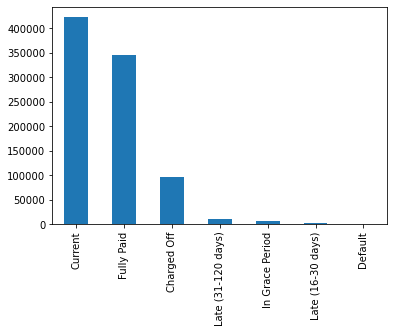

In [130]:
plot = df['loan_status'].value_counts().plot(kind = 'bar')

Por último, se realizará la **matriz de correlaciones** con las variables continuas.

In [131]:
matriz_correlaciones = df.corr()
matriz_correlaciones.style.background_gradient()

,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,open_acc_6m,open_act_il,open_il_12m,total_bal_il,open_rv_12m,open_rv_24m,open_il_24m,inq_last_12m,mths_since_last_major_derog,mths_since_recent_revol_delinq,mths_since_last_delinq,emp_length,mo_sin_old_il_acct,revol_util,dti,annual_inc,sub_grade,term,int_rate,installment,total_acc,fico_range_low,fico_range_high,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
mths_since_last_record,1.000000,-0.037540,-0.057360,-0.032272,-0.014922,-0.042597,0.000346,0.004893,-0.055815,-0.002077,-0.001326,-0.003023,-0.104838,-0.115880,0.020599,-0.066671,0.036692,-0.074116,-0.035102,0.027933,-0.063511,0.046660,0.063109,-0.079275,0.008761,0.037984,-0.001758,-0.016476,-0.159056,0.210486,0.210486,-0.271428,0.237999,-0.005499,-0.126552,-0.130708,0.032690,0.003539,0.122281
il_util,-0.037540,1.000000,0.060892,-0.279929,0.593590,0.150360,-0.112540,0.028667,0.165298,0.328907,0.328236,0.334039,0.068071,0.076814,0.300043,0.167643,-0.003623,0.059719,0.044520,-0.109813,0.002828,-0.053167,-0.013754,-0.051043,0.042975,0.016406,0.157807,-0.087767,0.118818,-0.131003,-0.131003,0.014497,0.016969,-0.097055,-0.047261,-0.110368,0.135907,0.019291,0.084515
mths_since_recent_bc_dlq,-0.057360,0.060892,1.000000,-0.031998,0.044862,0.036750,-0.017689,0.005231,0.069360,-0.017298,0.058731,0.005861,0.092337,0.131576,0.069339,0.041929,0.564954,0.889991,0.767427,0.013651,-0.004234,0.004577,0.007820,-0.042323,0.000750,-0.007866,0.007795,-0.045078,0.014722,-0.004356,-0.004356,0.116538,0.141381,-0.047508,-0.020753,0.002736,-0.018812,0.001701,-0.000433
mths_since_rcnt_il,-0.032272,-0.279929,-0.031998,1.000000,-0.121841,-0.210663,0.017891,-0.140431,-0.184580,-0.212217,-0.445132,-0.238783,-0.029961,-0.044192,-0.488463,-0.201590,-0.042589,-0.027812,-0.018482,-0.021516,0.063138,0.062440,-0.119586,-0.020215,-0.009079,-0.038663,-0.073163,-0.021756,-0.190807,-0.021591,-0.021588,-0.013397,-0.028170,-0.021203,-0.064018,0.036113,-0.154603,0.001690,-0.046849
all_util,-0.014922,0.593590,0.044862,-0.121841,1.000000,0.077283,0.125339,0.045566,-0.056383,0.375587,0.180031,0.293259,-0.148592,-0.163547,0.198310,0.026702,-0.014816,0.049720,0.022631,-0.068392,0.056582,0.651858,0.104644,0.002877,0.088661,0.059681,0.265741,0.026710,-0.002668,-0.427142,-0.427143,-0.017093,-0.024774,0.008626,-0.033800,-0.091511,-0.006149,0.020473,0.060016
inq_fi,-0.042597,0.150360,0.036750,-0.210663,0.077283,1.000000,-0.080155,0.085965,0.154810,0.085837,0.283379,0.143728,0.096117,0.131095,0.360183,0.555460,-0.008159,0.032257,0.001937,0.003101,0.006359,-0.072383,0.045580,0.016961,0.036874,0.019109,0.161102,0.010568,0.160424,-0.082352,-0.082353,0.062950,0.069057,-0.005323,0.095614,-0.041625,0.103958,-0.000904,0.028889
max_bal_bc,0.000346,-0.112540,-0.017689,0.017891,0.125339,-0.080155,1.000000,-0.009401,-0.082341,0.022062,-0.045040,0.106198,-0.098054,-0.112157,-0.032194,-0.075932,0.043480,-0.006496,0.012532,0.060388,0.114574,0.314826,0.068982,0.095123,-0.008692,0.121700,-0.059788,0.361556,0.137151,0.061076,0.061070,-0.101392,-0.116872,0.388533,0.230375,0.230835,0.118276,-0.008780,-0.208462
total_cu_tl,0.004893,0.028667,0.005231,-0.140431,0.045566,0.085965,-0.009401,1.000000,0.082488,0.072386,0.188601,0.110382,0.007583,0.010550,0.258066,0.076495,-0.005189,-0.008793,-0.009595,0.077423,0.111364,0.028929,0.072138,0.015441,0.005417,0.060197,0.016622,0.062481,0.281562,0.006084,0.006083,-0.001744,0.016141,0.074835,0.179413,0.061243,0.099378,-0.003978,-0.054601
open_acc_6m,-0.055815,0.165298,0.069360,-0.184580,-0.056383,0.154810,-0.082341,0.082488,1.000000,0.060527,0.345889,0.102495,0.622292,0.476662,0.258347,0.313227,0.032600,0.058644,0.046483,0.023881,0.021981,-0.190717,0.013978,0.011953,0.027508,-0.001339,0.151162,-0.002643,0.251915,-0.057584,-0.057586,0.054268,0.055810,-0.023191,0.063408,-0.002444,0.271011,-0.001395,-0.011898
open_act_il,-0.00

# SELECCIÓN DE VARIABLES

Antes de comenzar con el tratamiento de valores missing se va a proceder a la selección de las variables que vamos a usar para el análisis. Lo primero que haremos será ver el porcentaje de datos missing que hay en cada variable.

In [132]:
porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
datos_missing = pd.concat([porcentaje], axis=1, keys=["Porcentaje"])
datos_missing

,Porcentaje
mths_since_last_record,82.472279
il_util,75.524363
mths_since_recent_bc_dlq,74.523892
mths_since_rcnt_il,72.564427
all_util,71.804553
open_act_il,71.801502
open_acc_6m,71.801502
open_il_24m,71.801502
open_rv_24m,71.801502
open_rv_12m,71.801502


Una vez hemos calculado el porcentaje de datos missing de cada una de las variables, eliminaremos aquellas que tengan **alrededor del 50 por ciento de valores missing**.

In [133]:
df.drop(["mths_since_last_record", "il_util", "mths_since_recent_bc_dlq", "mths_since_rcnt_il", "all_util", "open_act_il", 
         "open_acc_6m", "open_il_24m", "open_rv_24m", "open_rv_12m", "total_bal_il", "open_il_12m", "max_bal_bc", "total_cu_tl",
         "inq_fi", "inq_last_12m", "mths_since_last_major_derog", "mths_since_recent_revol_delinq", "mths_since_last_delinq"], axis=1, inplace=True)

Además de dichas variables también se eliminarán las siguientes variables por diferentes razones:
- Variable `url`: no aporta información útil.
- Variable `id`: códigos que aportan información individual. 
- Variable `zip code` y `addr_state`. Ambas aportan información relativamente igual por tanto nos quedaremos con `addr_state` eliminando la variable `zip code`. 
- Variables `grade` y `sub_grade`. La información de la variable `grade` está incluida implicitamente en la variable `subgrade` por tanto eliminaremos la variable `grade`.


In [134]:
df.drop(["url", "id", "zip_code", "grade"], axis=1, inplace=True)

Una vez eliminadas las variables anteriores, se produce a una extracción de aquellas variables que encontramos más interesantes para nuestro estudio. El resto de las variables se eliminan a continuación.

In [135]:
variables = ["addr_state", "annual_inc", "dti", "emp_length", "emp_title", "fico_range_high", "fico_range_low", 
             "home_ownership", "initial_list_status", "installment", "int_rate", "loan_amnt", "mort_acc", "open_acc", 
             "pub_rec_bankruptcies", "pub_rec", "purpose", "sub_grade", "term", "total_acc", "loan_status"]

In [136]:
variables_eliminadas = [col for col in df.columns if col not in variables]
print(variables_eliminadas)

['mo_sin_old_il_acct', 'revol_util', 'verification_status', 'application_type', 'mo_sin_old_rev_tl_op', 'earliest_cr_line_month', 'earliest_cr_line_year']


In [137]:
df.drop(['mo_sin_old_il_acct', 'revol_util', 'verification_status', 'application_type', 'mo_sin_old_rev_tl_op', 'open_acc', 
        'earliest_cr_line_month', 'earliest_cr_line_year'], axis=1, inplace=True)

In [138]:
df.shape

(884884, 20)

Después de la eliminación de algunas variables obtenemos el dataframe que usaremos en nuestro análisis. Nuestro dataframe contiene 20 variables en total.

# TRATAMIENTO DE VALORES MISSING

Se importa la librería necesaria para imputar los valores.

In [139]:
from sklearn.impute import SimpleImputer

En el caso de que las variables continuas, los valores missing se sustituyen por la mediana.

In [145]:
# dti
dti_values = df.dti.values.reshape(-1,1)
imp_cont.fit(dti_values)
transformed_values_dti = imp_cont.transform(dti_values)

df.dti = transformed_values_dti

In [146]:
# annual_inc
annual_inc_values = df.annual_inc.values.reshape(-1,1)
imp_cont.fit(annual_inc_values)
transformed_values_annual_inc = imp_cont.transform(annual_inc_values)

df.annual_inc = transformed_values_annual_inc

In [150]:
# int_rate
int_rate_values = df.int_rate.values.reshape(-1,1)
imp_cont.fit(int_rate_values)
transformed_values_int_rate = imp_cont.transform(int_rate_values)

df.int_rate = transformed_values_int_rate

In [151]:
# installment
installment_values = df.installment.values.reshape(-1,1)
imp_cont.fit(installment_values)
transformed_values_installment = imp_cont.transform(installment_values)

df.installment = transformed_values_installment

In [162]:
# loan_amnt
loan_amnt_values = df.loan_amnt.values.reshape(-1,1)
imp_cont.fit(loan_amnt_values)
transformed_values_loan_amnt = imp_cont.transform(loan_amnt_values)

df.loan_amnt = transformed_values_loan_amnt

Si las variables son discretas, se sustituirán los missing por la moda.

In [144]:
# emp_length
emp_length_values = df.emp_length.values.reshape(-1,1)
imp_disc = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
imp_disc.fit(emp_length_values)
transformed_values_emp_length = imp_disc.transform(emp_length_values)

df.emp_length = transformed_values_emp_length

In [148]:
# sub_grade
sub_grade_values = df.sub_grade.values.reshape(-1,1)
imp_disc.fit(sub_grade_values)
transformed_values_sub_grade = imp_disc.transform(sub_grade_values)

df.sub_grade = transformed_values_sub_grade

In [149]:
# term
term_values = df.term.values.reshape(-1,1)
imp_disc.fit(term_values)
transformed_values_term = imp_disc.transform(term_values)

df.term = transformed_values_term

In [153]:
# total_acc
total_acc_values = df.total_acc.values.reshape(-1,1)
imp_disc.fit(total_acc_values)
transformed_values_total_acc = imp_disc.transform(total_acc_values)

df.total_acc = transformed_values_total_acc

In [156]:
# fico_range_low
fico_range_low_values = df.fico_range_low.values.reshape(-1,1)
imp_disc.fit(fico_range_low_values)
transformed_values_fico_range_low = imp_disc.transform(fico_range_low_values)

df.fico_range_low = transformed_values_fico_range_low

In [157]:
# fico_range_high
fico_range_high_values = df.fico_range_high.values.reshape(-1,1)
imp_disc.fit(fico_range_high_values)
transformed_values_fico_range_high = imp_disc.transform(fico_range_high_values)

df.fico_range_high = transformed_values_fico_range_high

In [159]:
# pub_rec
pub_rec_values = df.pub_rec.values.reshape(-1,1)
imp_disc.fit(pub_rec_values)
transformed_values_pub_rec = imp_disc.transform(pub_rec_values)

df.pub_rec = transformed_values_pub_rec

In [160]:
# pub_rec_bankruptcies
pub_rec_bankruptcies_values = df.pub_rec_bankruptcies.values.reshape(-1,1)
imp_disc.fit(pub_rec_bankruptcies_values)
transformed_values_pub_rec_bankruptcies = imp_disc.transform(pub_rec_bankruptcies_values)

df.pub_rec_bankruptcies = transformed_values_pub_rec_bankruptcies

In [161]:
# mort_acc
mort_acc_values = df.mort_acc.values.reshape(-1,1)
imp_disc.fit(mort_acc_values)
transformed_values_mort_acc = imp_disc.transform(mort_acc_values)

df.mort_acc = transformed_values_mort_acc

Finalmente, se imputan los valores de las variables cualitativas, sustituyendo los valores faltantes por la cadena 'SIN VALOR'.

In [142]:
# emp_title
emp_title_values = df.emp_title.values.reshape(-1,1)
imp_cadenas = SimpleImputer(missing_values=np.nan, strategy = 'constant',fill_value='SIN VALOR')
imp_cadenas.fit(emp_title_values)
transformed_values_emp_title = imp_cadenas.transform(emp_title_values)

df.emp_title = transformed_values_emp_title

In [147]:
# home_ownership
home_ownership_values = df.home_ownership.values.reshape(-1,1)
imp_cadenas.fit(home_ownership_values)
transformed_values_home_ownership = imp_cadenas.transform(home_ownership_values)

df.home_ownership = transformed_values_home_ownership

In [152]:
# loan_status
loan_status_values = df.loan_status.values.reshape(-1,1)
imp_cadenas.fit(loan_status_values)
transformed_values_loan_status = imp_cadenas.transform(loan_status_values)

df.loan_status = transformed_values_loan_status

In [154]:
# purpose
purpose_values = df.purpose.values.reshape(-1,1)
imp_cadenas.fit(purpose_values)
transformed_values_purpose = imp_cadenas.transform(purpose_values)

df.purpose = transformed_values_purpose

In [155]:
# addr_state
addr_state_values = df.addr_state.values.reshape(-1,1)
imp_cadenas.fit(addr_state_values)
transformed_values_addr_state = imp_cadenas.transform(addr_state_values)

df.addr_state = transformed_values_addr_state

In [158]:
# initial_list_status
initial_list_status_values = df.initial_list_status.values.reshape(-1,1)
imp_cadenas.fit(initial_list_status_values)
transformed_values_initial_list_status = imp_cadenas.transform(initial_list_status_values)

df.initial_list_status = transformed_values_initial_list_status